Epoch 0, Loss: 0.9452
Epoch 100, Loss: 0.6730
Epoch 200, Loss: 0.5699
Epoch 300, Loss: 0.4962
Epoch 400, Loss: 0.4410
Epoch 500, Loss: 0.3982
Epoch 600, Loss: 0.3640
Epoch 700, Loss: 0.3360
Epoch 800, Loss: 0.3126
Epoch 900, Loss: 0.2925

Training Complete!
Final Predictions:
Input: [0 0], Target: 0, Predicted: 0
Input: [0 1], Target: 0, Predicted: 0
Input: [1 0], Target: 0, Predicted: 0
Input: [1 1], Target: 1, Predicted: 1


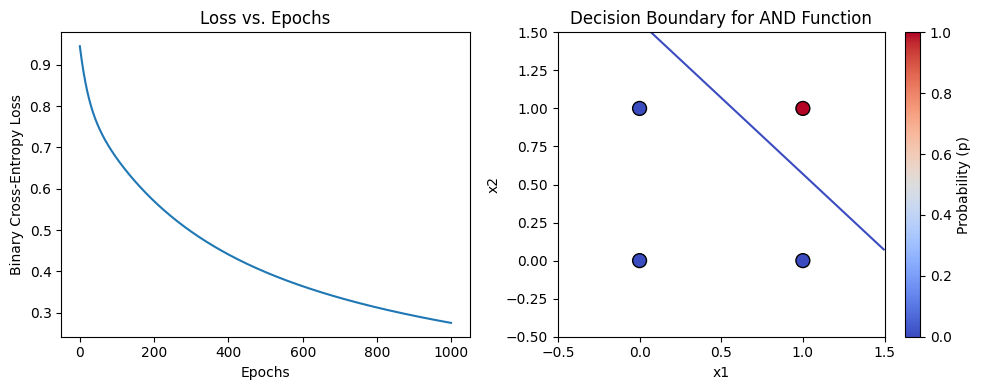

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Define the AND Dataset
# --------------------------
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs: 4 samples, 2 features each
y = np.array([[0], [0], [0], [1]])              # Targets: 4 samples, 1 output each

# --------------------------
# Step 2: Initialize Model Parameters
# --------------------------
# Weights (2 features → 1 output) and bias (scalar)
np.random.seed(42)  # For reproducibility
W = np.random.randn(2, 1)  # Shape: (2, 1), initial random weights
b = np.random.randn(1)     # Shape: (1,), initial random bias

# Hyperparameters
learning_rate = 0.1
epochs = 1000  # Number of training iterations

# --------------------------
# Step 3: Define Sigmoid Activation and Loss Function
# --------------------------
def sigmoid(z):
    """Convert logits (z) to probabilities (0-1)."""
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(p, y_true):
    """Compute Binary Cross-Entropy Loss (BCE)."""
    return -np.mean(y_true * np.log(p) + (1 - y_true) * np.log(1 - p))

# --------------------------
# Step 4: Training Loop with Gradient Descent
# --------------------------
loss_history = []  # To track loss over epochs

for epoch in range(epochs):
    # Forward Pass: Compute predictions
    z = np.dot(X, W) + b          # Logits: z = W·X + b (shape: (4,1))
    p = sigmoid(z)                # Probabilities (shape: (4,1))

    # Compute Loss
    current_loss = binary_cross_entropy(p, y)
    loss_history.append(current_loss)

    # Backward Pass: Compute gradients
    # Derivative of BCE loss w.r.t. logits (z): (p - y) / batch_size
    # Here, batch_size = 4 (all samples)
    dz = (p - y) / X.shape[0]    # Average gradient for logits (shape: (4,1))
    dW = np.dot(X.T, dz)          # Gradient for weights (shape: (2,1))
    db = np.mean(dz)              # Gradient for bias (scalar, average over samples)

    # Update weights and bias using gradient descent
    W -= learning_rate * dW
    b -= learning_rate * db

    # Track loss every 100 epochs for debugging
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {current_loss:.4f}")

# --------------------------
# Step 5: Test the Trained Model
# --------------------------
# Forward pass with learned parameters
z_test = np.dot(X, W) + b
p_test = sigmoid(z_test)
y_pred = (p_test >= 0.5).astype(int)  # Threshold probabilities to 0/1

print("\nTraining Complete!")
print("Final Predictions:")
for i in range(X.shape[0]):
    print(f"Input: {X[i]}, Target: {y[i][0]}, Predicted: {y_pred[i][0]}")

# --------------------------
# Step 6: Plot Loss and Decision Boundary
# --------------------------
# Plot Loss over Epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")

# Plot Decision Boundary
x1 = np.linspace(-0.5, 1.5, 100)  # Range for x1 (input 1)
x2 = np.linspace(-0.5, 1.5, 100)  # Range for x2 (input 2)
XX, YY = np.meshgrid(x1, x2)      # Create grid of (x1, x2) points
grid_inputs = np.c_[XX.ravel(), YY.ravel()]  # Flatten grid to (10000, 2) array
z_grid = np.dot(grid_inputs, W) + b          # Compute logits for grid points
p_grid = sigmoid(z_grid).reshape(XX.shape)    # Reshape probabilities to grid shape

plt.subplot(1, 2, 2)
plt.contour(XX, YY, p_grid, levels=[0.5], cmap='coolwarm') # Changed contourf to contour and removed alpha
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k', s=100)
plt.title("Decision Boundary for AND Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Probability (p)")
plt.tight_layout()
plt.show()

In [ ]:
# Import libraries
import numpy as np

# AND gate training data
# Input: [x1, x2], Output: y
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
weights = np.random.rand(2)  # 2 weights for 2 inputs
bias = np.random.rand(1)

# Learning rate
lr = 0.1

# Number of epochs
epochs = 20

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Training loop using gradient descent
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)

        # Error
        error = y[i] - y_pred
        total_error += error**2

        # Update weights and bias
        weights += lr * error * X[i]
        bias += lr * error

    print(f"Epoch {epoch+1}/{epochs}, Total Error: {total_error}")

print("\nTraining completed!")
print("Weights:", weights)
print("Bias:", bias)

# Testing
print("\nTesting AND gate perceptron:")
for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]}, Predicted Output: {output}")

Epoch 1/20, Total Error: 3
Epoch 2/20, Total Error: 3
Epoch 3/20, Total Error: 2
Epoch 4/20, Total Error: 1
Epoch 5/20, Total Error: 2
Epoch 6/20, Total Error: 1
Epoch 7/20, Total Error: 2
Epoch 8/20, Total Error: 2
Epoch 9/20, Total Error: 1
Epoch 10/20, Total Error: 0
Epoch 11/20, Total Error: 0
Epoch 12/20, Total Error: 0
Epoch 13/20, Total Error: 0
Epoch 14/20, Total Error: 0
Epoch 15/20, Total Error: 0
Epoch 16/20, Total Error: 0
Epoch 17/20, Total Error: 0
Epoch 18/20, Total Error: 0
Epoch 19/20, Total Error: 0
Epoch 20/20, Total Error: 0

Training completed!
Weights: [0.21623288 0.17662464]
Bias: [-0.35051581]

Testing AND gate perceptron:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1
